<a href="https://colab.research.google.com/github/brytlao/Practical_computer_vision/blob/master/CHAPTER_02_Libraries%2C_Development_Platform%2C_and_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 02: Libraries, Development Platform, and Datasets**

Outlines how to setup a working environment for future chapters. Since I use Google Colab, some sections are skipped/modified.

# **Libraries and installation**

**Python environment**

*   Anaconda (package manager) and Jupyter (presentation layer)
*   Colaboratory (has both)

**Scientific packages**

*   Numpy
*   Matplotlib
*   SciPy
*   scikit-learn
*   pandas
*   seaborn

# **OpenCV**

Most popular computer vision open source library

**Single image file**

In [1]:
# import dependencies
import cv2
print(cv2.__version__)
from google.colab.patches import cv2_imshow # alternative to cv2.imshow in colaboratory

3.4.3


In [2]:
# upload file using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
img_name = list(uploaded)[0]

Saving dragon.png to dragon (1).png


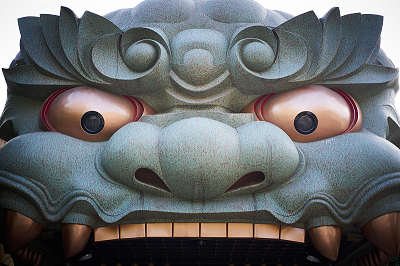

In [3]:
# read an image from file
img = cv2.imread(img_name)

# write image to a file
cv2.imwrite('image.png',img)

# display image
cv2_imshow(img)

**Single video file**

In [4]:
# import dependencies
import cv2
print(cv2.__version__)
from google.colab.patches import cv2_imshow # alternative to cv2.imshow in colaboratory
import matplotlib.pyplot as plt

3.4.3


In [5]:
# upload file using explorer
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
  open(k, 'wb').write(v)
vid_name = list(uploaded)[0]

Saving walking.avi to walking (1).avi


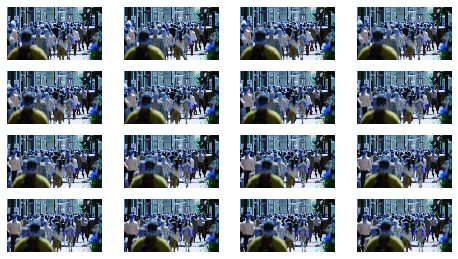

In [6]:
# using a video file
video_capture = cv2. VideoCapture(vid_name)

# display each frame in video file
plt.figure(figsize=(8,4.5))
plot_dim = 4
for x in range(0,plot_dim*plot_dim):
  # get each frame
  ret, frame = video_capture.read()
  
  # quit if no frame
  if not ret:
    print("frame not available")
    break
    
  # show frame in window
  image = frame
  plt.subplot(plot_dim,plot_dim,x+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image)
plt.show()

# **Deep learning**

**TensorFlow**

Popular deep learning library.

In [7]:
# to install
!pip install -U tensorflow_datasets
import tensorflow as tf
print(tf.__version__)

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (1.0.1)
1.13.1


**Keras**

Python-based API using TensorFlow, CNTK, or Theano as backend for deep learning. TensorFlow includes tf.keras, an implementation of the Keras API.

# **Datasets**

**Open source datasets**

*   ImageNet
*   MNIST
*   CIFAR-10
*   Pascal VOC
*   MSCOCO
*   TUM RGB-D

**MNIST**

Handwritten digits

In [8]:
# import dependencies
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)
tf.enable_eager_execution() # tf issue
import matplotlib.pyplot as plt

# progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

1.13.1


In [9]:
# download dataset
dataset, metadata = tfds.load("mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# determine size of data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("num train samples: {}".format(num_train_examples))
print("num test samples: {}".format(num_test_examples))

num train samples: 60000
num test samples: 10000


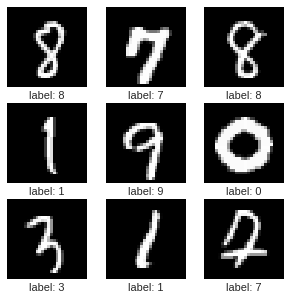

In [10]:
# plot sample image
plt.figure(figsize=(5,5))
i = 0
for image,label in train_dataset.take(9):
  image = image.numpy().reshape((28,28))
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap='gray')
  plt.xlabel('label: {}'.format(label))
  i += 1
plt.show()

**CIFAR-10**

Colored images

In [11]:
# import dependencies
import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)
print(tf.__version__)
tf.enable_eager_execution() # tf issue
import matplotlib.pyplot as plt

# progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

1.13.1


In [12]:
# download dataset
dataset, metadata = tfds.load("cifar10", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

# determine size of data
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples
print("num train samples: {}".format(num_train_examples))
print("num test samples: {}".format(num_test_examples))


num train samples: 50000
num test samples: 10000


In [0]:
# determine class labels
class_labels = metadata.features['label'].names

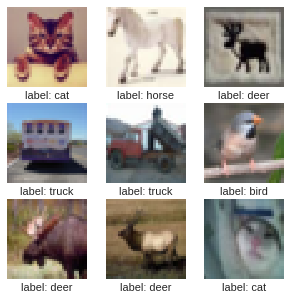

In [14]:
# plot sample image
plt.figure(figsize=(5,5))
i = 0
for image,label in train_dataset.take(9):
  image = image.numpy()
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap='gray')
  plt.xlabel('label: {}'.format(class_labels[label]))
  i += 1
plt.show()